<a href="https://colab.research.google.com/github/chris-iscool/machinelearning/blob/main/Linear_Regression_Toy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Nur für die Tensorflow Version
%tensorflow_version 2.x

In [ ]:
# Wichtige imports für Tensorflow
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

Model $f( \bf{x} )$ abhängig von:    


*   Learning rate $\eta$
*   Feature $\bf{x}$
*   Label $\bf{y}$
*   Batch size $N$
*   Time/epoch $T$

In [ ]:
def build_model(eta):
  # Ein einfaches Model, ein Layer, ein Knoten (Neuron), eine Funktion
  f = tf.keras.models.Sequential()

  f.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Alle weiteren Eigenschaften des 1 Neuron Model werden hier bestimmt, wie Lernen durch Root Mean Square
  f.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=eta), loss="mean_squared_error", metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return f

# Training des Neurons:
def train_model(model, feature, label, batchsize, epochs_T):
  # Wir trainieren das Neuron für eine gegebene Anzahl an Epochen
  training_history = model.fit(x=feature, y=label, batch_size=batchsize, epochs=epochs_T)

  # Gewichte und Biases können jetzt aus dem trainierten Neuron extrahiert werden
  # Ebenso die Zeiten/Epochen, die Zustände (Historien) zu diesen Zeiten, und die Liste der RMS zu den jeweiligen Zeiten
  trained_weights = model.get_weights()[0]
  trained_biases = model.get_weights()[1]
  epochs = training_history.epoch
  states = pd.DataFrame(training_history.history)
  rms_errors = states["root_mean_squared_error"]

  return [trained_weights, trained_biases, epochs, rms_errors]

In einem trainierten Modell $f(\bf{x})$ besteht der lineare Zusammenhang mit den Gewichten $\bf{w}$ und den Biases $\bf{b}$ wie folgt:    
$$ \bf{y} = \bf{w} \cdot \bf{x} + \bf{b} $$

Wir wollen nun für ein trainiertes Modell die "vorhergesagten" (trainierten) mit den tatsächlichen Daten vergleichen! Da unser Neuron strikt eindimensional definiert wurde, kann ein xy-Scatter Plot dafür herangezogen werden.

In [ ]:
def plot_model(features, labels, trained_weight, trained_bias):
  # Labels für die Achsen
  plt.figure()
  plt.xlabel("Feature x")
  plt.ylabel("Label y")

  # Plotte die "echten" Daten
  plt.scatter(features, labels)

  # Plotte das Ergebnis der linearen Regression, also eine Gerade mit dem trainierten Gewicht und Bias der letzten Epoche
  x0 = 0
  y0 = trained_bias
  x1 = features[-1]
  y1 = y0 + trained_weight * x1

  plt.plot([x0, x1], [y0, y1])
  plt.show()

def plot_errors(epochs, rms_errors):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Square Error")

  plt.plot(epochs, rms_errors)
  plt.ylim([rms_errors.min() * 0.97, rms_errors.max()])
  plt.show()

Für den "Proof of concept" testen wir das Neuron zunächst an einem kleinen künstlichen Datensatz.

In [ ]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Das Neuron kann jetzt über die Parameter $\eta$, $N$ und $T$ feingetuned werden.

Epoch 1/60
12/12 [==============================] - 0s 2ms/step - loss: 839.5667 - root_mean_squared_error: 28.9753
Epoch 2/60
12/12 [==============================] - 0s 2ms/step - loss: 439.5119 - root_mean_squared_error: 20.9645
Epoch 3/60
12/12 [==============================] - 0s 2ms/step - loss: 211.9882 - root_mean_squared_error: 14.5598
Epoch 4/60
12/12 [==============================] - 0s 2ms/step - loss: 84.6491 - root_mean_squared_error: 9.2005
Epoch 5/60
12/12 [==============================] - 0s 1ms/step - loss: 22.1599 - root_mean_squared_error: 4.7074
Epoch 6/60
12/12 [==============================] - 0s 1ms/step - loss: 3.6552 - root_mean_squared_error: 1.9119
Epoch 7/60
12/12 [==============================] - 0s 1ms/step - loss: 2.2556 - root_mean_squared_error: 1.5019
Epoch 8/60
12/12 [==============================] - 0s 1ms/step - loss: 1.9446 - root_mean_squared_error: 1.3945
Epoch 9/60
12/12 [==============================] - 0s 1ms/step - loss: 1.7691 - root

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


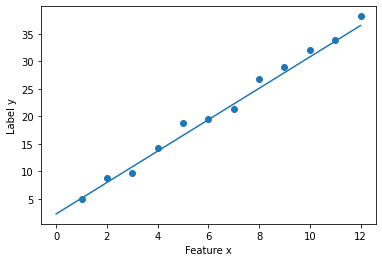

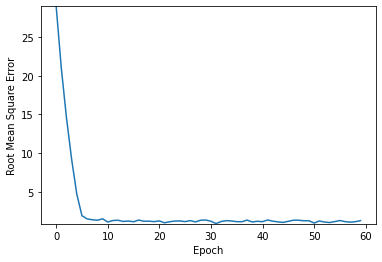

In [ ]:
eta = 0.1 # learning rate
N = 1 # batch size
T = 60 # number of epochs

neuron = build_model(eta)
[trained_weight, trained_bias, epochs, ems_errors] = train_model(neuron, my_feature, my_label, N, T)

plot_model(my_feature, my_label, trained_weight, trained_bias)
plot_errors(epochs, ems_errors)

Als Zusammenfassung: Die Feintuningparameter $\eta$, $N$ und $T$ sind für die Konvergenz des Modells wichtig. Sie müssen an die Art der zu erfassenden Daten angepasst werden.